# Chapter 10- Ex3: poverty.txt

# Given the poverty.txt data, containing
+ Location: State name
+ PovPct: % of population living in households with income below “poverty level”
+ Brth15to17: Birth rate for females 15 to 17 years old = births per 1,000 persons in group.
+ Brth18to19: Birth rate for females 18 to 19 years old = births per 1,000 persons in group.
+ ViolCrime: Violent crime rate in state
+ TeenBrth: Birth rate for females 15 to 19 years old = births per 1,000 persons in group

# Predict Brth15to17 from other features like PovPct, ViolCrime,....

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [13]:
birth = pd.read_csv('Data/poverty.txt', sep = '\t')

birth.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [15]:
birth.shape

(51, 6)

In [17]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [46]:
birth.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


## <span style = 'color:yellow'> Build XGBoostRegressor

In [48]:
x = birth[['PovPct', 'ViolCrime']]
y = birth['Brth15to17']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [80]:
from xgboost import XGBRegressor

xgb_rg = XGBRegressor(seed = 1, min_child_weight = 5, eta = 0.1, gamma = 30)
xgb_rg.fit(x_train, y_train, verbose = False, eval_set = [(x_test, y_test)])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=30,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None, ...)

Accuracy on train set: 0.8150416495066026
Accuracy on test  set: 0.4525235048100644

Mean squared error test set: 25.262013359786444
Mean absolute error test set: 4.168346959894354



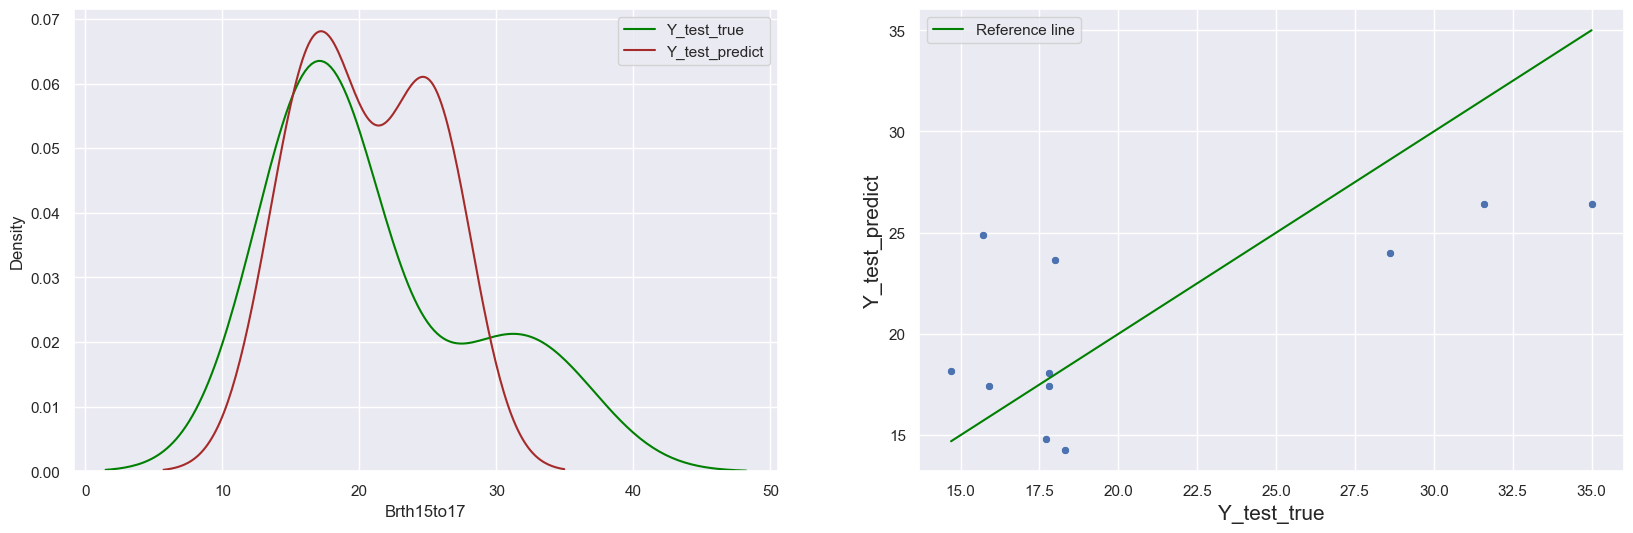

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test_pred = xgb_rg.predict(x_test)

print(f'Accuracy on train set: {xgb_rg.score(x_train, y_train)}')
print(f'Accuracy on test  set: {xgb_rg.score(x_test, y_test)}')
print()

print(f'Mean squared error test set: {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean absolute error test set: {mean_absolute_error(y_test, y_test_pred)}')
print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sbn.kdeplot(y_test, label = "Y_test_true", color = 'green')
sbn.kdeplot(y_test_pred, label = "Y_test_predict", color = 'brown')
plt.legend()

plt.subplot(1,2,2)
sbn.lineplot(x = [y_test.min(), y_test.max()], y = [y_test.min(), y_test.max()], label = 'Reference line', color = 'green')
sbn.scatterplot(x = y_test, y = y_test_pred)
plt.xlabel("Y_test_true", size=15)
plt.ylabel("Y_test_predict", size=15)
plt.show()

## <span style = 'color:yellow'> Use Cross-Validation K-fold

In [107]:
xgb_rg = XGBRegressor(seed = 1, min_child_weight = 5, eta = 0.1, gamma = 30)
xgb_rg.fit(x, y)

from sklearn.model_selection import cross_val_score, KFold
R_cross = cross_val_score(xgb_rg, x, y, cv = KFold(n_splits = 5))

R_cross.mean()

0.5706572057521139